In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [2]:
fmnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full),(X_test, y_test) = fmnist.load_data()

In [3]:
X_train_full[1]

array([[  0,   0,   0,   0,   0,   1,   0,   0,   0,   0,  41, 188, 103,
         54,  48,  43,  87, 168, 133,  16,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0,   0,  49, 136, 219, 216, 228, 236,
        255, 255, 255, 255, 217, 215, 254, 231, 160,  45,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  14, 176, 222, 224, 212, 203, 198, 196,
        200, 215, 204, 202, 201, 201, 201, 209, 218, 224, 164,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 188, 219, 200, 198, 202, 198, 199, 199,
        201, 196, 198, 198, 200, 200, 200, 200, 201, 200, 225,  41,   0,
          0,   0],
       [  0,   0,   0,   0,  51, 219, 199, 203, 203, 212, 238, 248, 250,
        245, 249, 246, 247, 252, 248, 235, 207, 203, 203, 222, 140,   0,
          0,   0],
       [  0,   0,   0,   0, 116, 226, 206, 204, 207, 204, 101,  75,  47,
         73,  48,  50,  45,  51,  63, 113, 222, 202, 206, 220, 224,   0,
          0,   0],
       [  

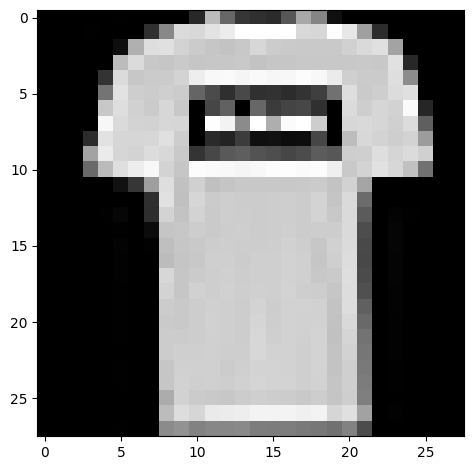

In [4]:
from skimage import io
io.imshow(X_train_full[1])
#plt.imshow(X_train_full[0], cmap=plt.get_cmap('gray')) #alternatively

In [5]:
X_train_full.shape, y_train_full.shape

((60000, 28, 28), (60000,))

In [6]:
X_test.shape, y_test.shape

((10000, 28, 28), (10000,))

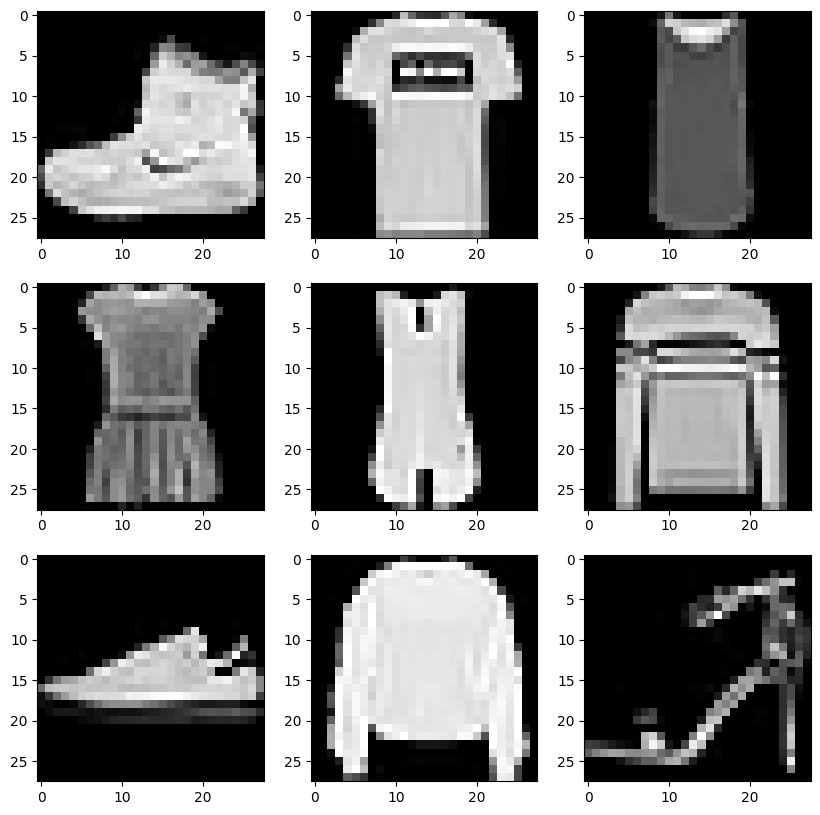

In [7]:
#displaying the first 9 images from training dataset

fig, axes= plt.subplots(nrows=3, ncols=3, figsize=(10,10))
a=0

for i in range(3):
    for j in range(3):
        axes[i,j].imshow(X_train_full[a], cmap=plt.get_cmap('gray'))
        a = a+1
        
plt.show()

In [8]:
#splitting x_train_full into validation and training sets

X_valid, X_train = X_train_full[:5000]/255, X_train_full[5000:]/255
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test/255

In [9]:
X_valid[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [10]:
y_valid[0] # 9 = ankle boot

9

In [11]:
class_names=['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

In [12]:
class_names[y_valid[0]]

'Ankle Boot'

## Creating Neural Network

In [13]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation = 'relu'))
model.add(keras.layers.Dense(100, activation = 'relu'))
model.add(keras.layers.Dense(10, activation = 'softmax')) #10 neuron cuz 10 possible outcome (0-9)

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd',metrics=['accuracy'])

In [16]:
history=model.fit(X_train, y_train, epochs=35, validation_data=(X_valid, y_valid), batch_size=32)

Epoch 1/35
1719/1719 [==============================] - 3s 2ms/step - loss: 0.7296 - accuracy: 0.7635 - val_loss: 0.5106 - val_accuracy: 0.8252
Epoch 2/35
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4923 - accuracy: 0.8284 - val_loss: 0.4423 - val_accuracy: 0.8456
Epoch 3/35
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4478 - accuracy: 0.8412 - val_loss: 0.4303 - val_accuracy: 0.8480
Epoch 4/35
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4210 - accuracy: 0.8507 - val_loss: 0.3982 - val_accuracy: 0.8632
Epoch 5/35
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4010 - accuracy: 0.8588 - val_loss: 0.3980 - val_accuracy: 0.8642
Epoch 6/35
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3839 - accuracy: 0.8645 - val_loss: 0.3946 - val_accuracy: 0.8640
Epoch 7/35
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3693 - accuracy: 0.8699 - val_loss: 0.3671 - val_accuracy:

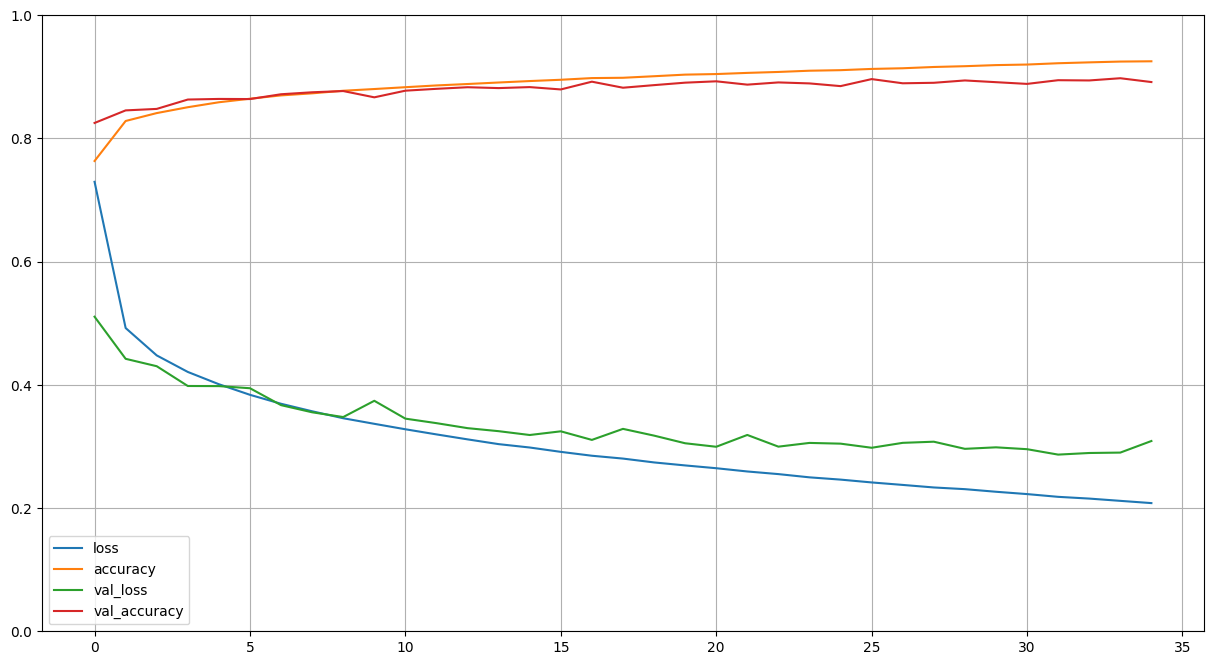

In [17]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(15,8))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [18]:
model.evaluate(X_test,y_test) ## [loss, accuracy]

313/313 [==============================] - 1s 2ms/step - loss: 0.3383 - accuracy: 0.8797


[0.33825063705444336, 0.8797000050544739]

In [19]:
y_prob = model.predict(X_test)
y_classes = y_prob.argmax(axis = -1)
y_classes

313/313 [==============================] - 0s 1ms/step


array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [20]:
confusion_matrix=tf.math.confusion_matrix(y_test, y_classes)

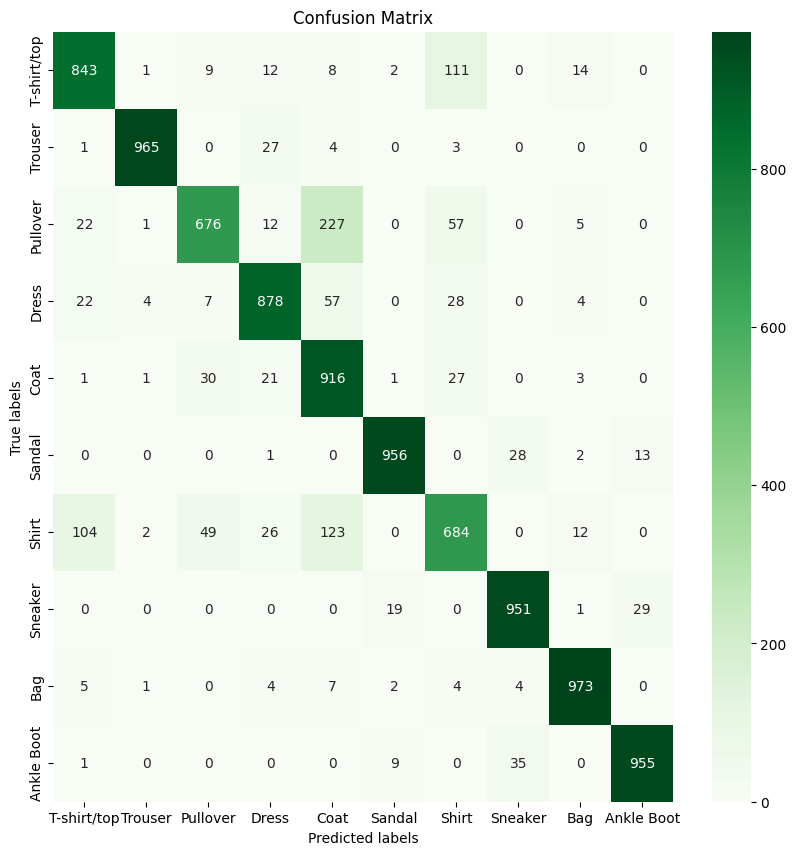

In [22]:
import seaborn as sns

fig = sns.heatmap(confusion_matrix, annot=True, fmt='g', cmap='Greens')

fig.set_xlabel('Predicted labels')
fig.set_ylabel('True labels')
fig.set_title('Confusion Matrix')
fig.xaxis.set_ticklabels(class_names)
fig.yaxis.set_ticklabels(class_names)
fig.figure.set_size_inches(10,10)

plt.show()

From the above confusion matrix, we can see that Pullover is the most misclassified class. Pullover is classified as Coat 227 times. Which makes sense.